In [1]:
from ase.io.vasp import read_vasp
from ase.visualize import view
from ase.visualize.plot import plot_atoms
from ase.build import surface, make_supercell
from ase.build.surfaces_with_termination import surfaces_with_termination, atom_index_in_top, atom_index_in_bottom
from ase.geometry import get_layers
from ase.build import bulk, hcp10m10, hcp0001
from ase.build import stack
from ase.io import write
from ase.io.vasp import write_vasp
from importlib.machinery import  SourceFileLoader
from ase import Atoms
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(25,10))
import numpy as np
from ase.build.surfaces_with_termination import (atom_index_in_bottom, atom_index_in_top)
from Tools import plotviews

In [2]:
zro2 = read_vasp('Structure/POSCAR')

In [3]:
def remove_bottom_atom(theatoms):
    atoms = theatoms.copy()
    layers, hs = get_layers(atoms,(0,0,1))
    atoms_in_bottom = atom_index_in_bottom(layers)
    atoms.pop(atoms_in_bottom[-1])
    return atoms

In [4]:
ZrO2001Oterm = surfaces_with_termination(zro2, [0,0,1],layers=4, vacuum=15., termination='O',verbose=True, symmetric=True)
[write_vasp(f'ZrO2001_1x1_{i}.vasp', thisone, sort=True, direct=True) for i, thisone in enumerate(ZrO2001Oterm)]

([4], ['Zr']) ([20], ['O'])
([3], ['O']) ([18], ['O'])
([5], ['Zr']) ([21], ['O'])
([2], ['O']) ([19], ['O'])


[None, None, None, None]

In [5]:
ZrO2001Zrterm = surfaces_with_termination(zro2, [0,0,1], 5, vacuum=10., termination='Zr',symmetric=True)

([0], ['O']) ([28], ['Zr'])
([1], ['O']) ([29], ['Zr'])


In [6]:
ZrO2001Zrterm_2x2 = [make_supercell(ZrO2001Zrterm[i],[[2,0,0],[0,2,0],[0,0,1]],tol=1e-10, wrap=True) for i in range(len(ZrO2001Zrterm))]
translate = [this.translate([this[0].x]) for this in ZrO2001Zrterm_2x2]
write_the_cells = [this.write(f'ZrO2001_2x2_{i}.vasp',sort=True, direct=True, format='vasp') for i,this in enumerate(ZrO2001Zrterm_2x2)]

[(<Axes:>, <Axes:>, <Axes:>), (<Axes:>, <Axes:>, <Axes:>)]

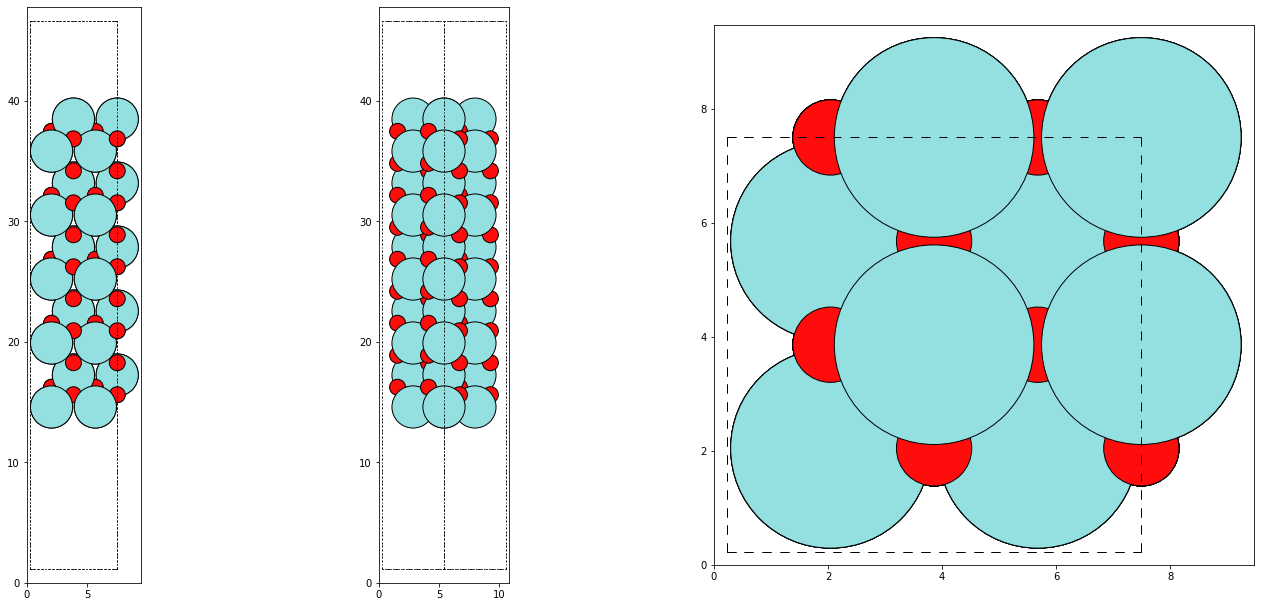

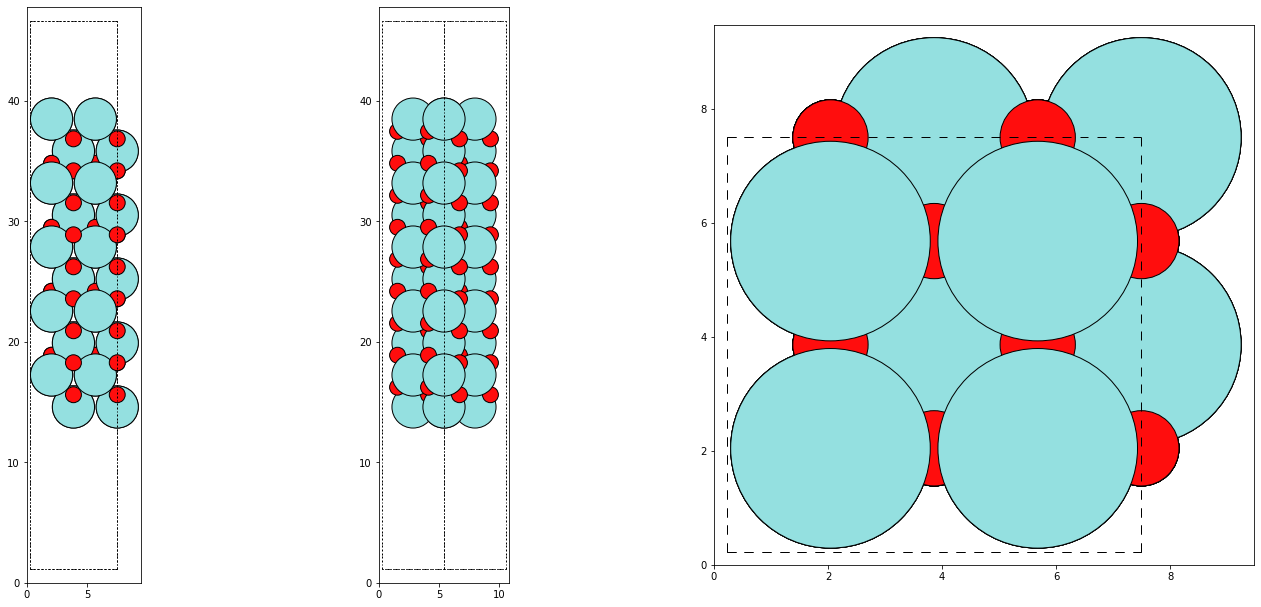

In [7]:
[ plotviews(this) for this in ZrO2001Zrterm_2x2]

In [8]:
rotated = []
RotAdStruc = []
dang = 15  # saltos entre los ángulos siguientes
planos = ('0001')
surfaces = (ZrO2001Zrterm)
for i in range(0, len(planos)):
    ZrSurface = surfaces[i]
    plano = planos[i]
    for ang in range(75, 91, dang):
        rotated.append(ZrSurface[0].copy())
        rotated[-1].center()
        rotated[-1].rotate(ang, 'z', center="com")
        tl.get_adsite(rotated[-1], site='top', face='bottom')   # bottom para metal
        print(rotated[-1].info)
        RotAdStruc.append(tl.make_adstruc(rotated[-1], 'RotBotTop', theface='bottom', thesite='top'))
        name = f'{ang}_{plano}_rotated.vasp'
        rotated[-1].write(name, direct=True, sort=True)

AttributeError: 'Atom' object has no attribute 'copy'

In [ ]:
for i, thisatoms in enumerate(rotated):
    fig, ax = plt.subplots(1, 3)
    plot_atoms(thisatoms, ax=ax[0])
    plot_atoms(thisatoms, ax=ax[1], rotation="-90x")
    plot_atoms(RotAdStruc[i], ax=ax[2], rotation='-90x')